In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
sigma = 0.5
tau = 0.1

Я решаю задачу регрессии:

$$
\mathbf{y} = \mathbf{Xw} + \epsilon, \ \epsilon ~ \mathcal{N}(0, \sigma^2\mathbf{I}), \  p(\mathbf{w}|\alpha) = \mathcal{N}(0, \tau^{-1}\mathbf{I})
$$



In [11]:
w_true_1 = (np.random.random(2) - 0.5) * 4
w_true_2 = (np.random.random(2) - 0.5) * 4
X = np.random.uniform(0, 1, (1000, 2))
X_1 = X[X[:, 0] - X[:, 1] > 0]
X_2 = X[X[:, 0] - X[:, 1] <= 0]
y_1 = X_1.dot(w_true_1) + np.random.normal(0, sigma, X_1.shape[0])
y_2 = X_2.dot(w_true_2) + np.random.normal(0, sigma, X_2.shape[0])

У нас есть 2 домена, точки и звездочки: 

У каждого домена есть свой вектор весов $\mathbf{w}$. 

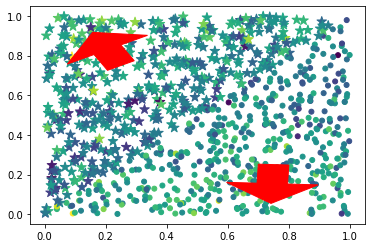

In [12]:
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_1, marker='.', s=100)
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2, marker='*', s=100)
plt.arrow(0.75, 0.25, w_true_1[0]/10, w_true_1[1]/10, width = 0.1, head_length=0.1, color='r')
plt.arrow(0.25, 0.75, w_true_2[0]/10, w_true_2[1]/10, width = 0.1, head_length=0.1, color='r')

In [13]:
w_approx_1 = np.linalg.inv(X_1.T.dot(X_1) + tau * sigma**2).dot(X_1.T.dot(y_1))
sigma_approx_1 = np.linalg.inv(tau + X_1.T.dot(X_1) / sigma ** 2)

w_approx_2 = np.linalg.inv(X_2.T.dot(X_2) + tau * sigma**2).dot(X_2.T.dot(y_2))
sigma_approx_2 = np.linalg.inv(tau + X_2.T.dot(X_2) / sigma ** 2)

In [14]:
def get_grid_xy(x0, x1, y0, y1, freq=1000):
    plt_x = np.linspace(x0, x1, freq)
    plt_y = np.linspace(y0, y1, freq)
    plt_x, plt_y = np.meshgrid(plt_x, plt_y)

    pos = np.empty(plt_x.shape + (2,))
    pos[:, :, 0] = plt_x
    pos[:, :, 1] = plt_y
    return pos

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

In [15]:
limits_1 = [w_approx_1[0] - 50 * sigma_approx_1[0, 0],
            w_approx_1[0] + 50 * sigma_approx_1[0, 0],
            w_approx_1[1] - 50 * sigma_approx_1[1, 1],
            w_approx_1[1] + 50 * sigma_approx_1[1, 1]]

limits_2 = [w_approx_2[0] - 50 * sigma_approx_2[0, 0],
            w_approx_2[0] + 50 * sigma_approx_2[0, 0],
            w_approx_2[1] - 50 * sigma_approx_2[1, 1],
            w_approx_2[1] + 50 * sigma_approx_2[1, 1]]
            
pos_1 = get_grid_xy(*limits_1)

pos_2 = get_grid_xy(*limits_2)

plt_z_1 = multivariate_gaussian(pos_1, w_approx_1, sigma_approx_1)
plt_z_2 = multivariate_gaussian(pos_2, w_approx_2, sigma_approx_2)

Итоговое распределение: 

Красная точка - правильный ответ.

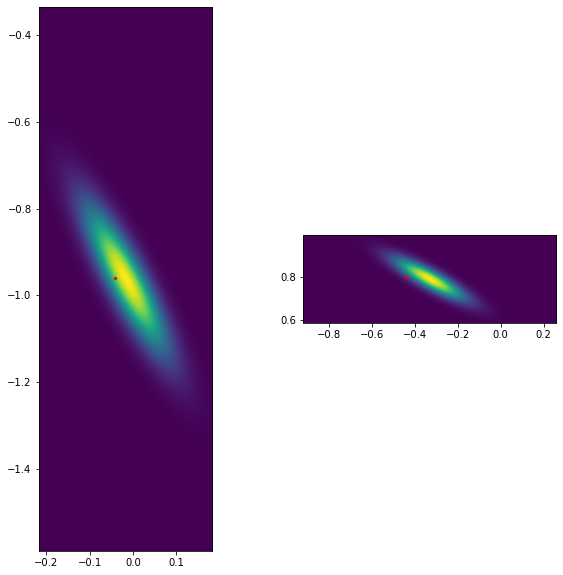

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
ax1.imshow(plt_z_1[::-1], extent=limits_1)
ax1.scatter(w_true_1[0], w_true_1[1], c='r', s=5)

ax2.imshow(plt_z_2[::-1], extent=limits_2)
ax2.scatter(w_true_2[0], w_true_2[1], c='r', s=5)